In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bionetgen
import roadrunner

In [2]:
# A simple BioNetGen model
mname="simple"
mstring='''
begin model
begin parameters
  k1 10
  k2 1
end parameters
begin species
  A() 0
end species
begin observables
  Molecules A A()
end observables
begin reaction rules
  0 <-> A() k1, k2
end reaction rules
end model
'''
with open(mname+".bngl", "w") as f:
  f.write(mstring) 
f.close()

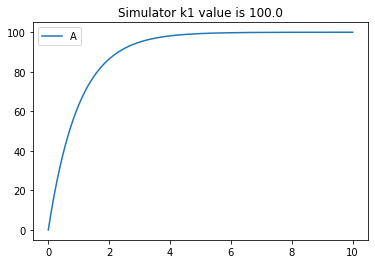

In [3]:
# Load model from BNGL

model = bionetgen.bngmodel( mname + ".bngl") 
# Parameter change needs to occur before simulator object is created
model.parameters.k1=100 # Original value is 10
sim = model.setup_simulator() # sim is a libroadrunner simulator object
res= sim.simulate(0,10,1000,selections=['Time']+['A'])
plt.plot(res['time'],res['A'],label='A')
plt.title('Simulator k1 value is '+ f'{sim.k1}')
_= plt.legend()

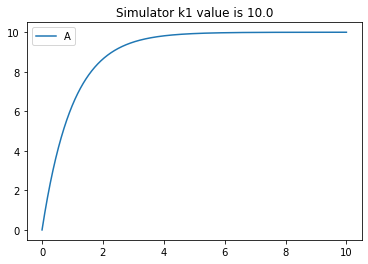

In [4]:
# Load model from BNGL
mname="simple"
model = bionetgen.bngmodel( mname + ".bngl") 
sim = model.setup_simulator() # sim is a libroadrunner simulator object
# Changing the value of the parameter in the bngmodel object has no effect on the simulator
model.parameters.k1=100
res= sim.simulate(0,10,1000,selections=['Time']+['A'])
plt.plot(res['time'],res['A'],label='A')
plt.title('Simulator k1 value is '+ f'{sim.k1}')
_= plt.legend()


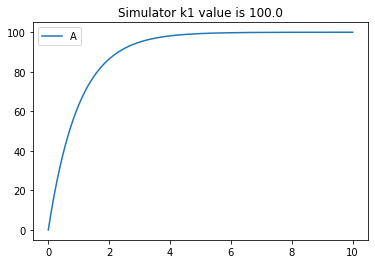

In [5]:
# Load model from BNGL
mname="simple"
model = bionetgen.bngmodel( mname + ".bngl") 
sim = model.setup_simulator() # sim is a libroadrunner simulator object
# Parameters of the sim object can be changed directly
sim.k1= 100 
res= sim.simulate(0,10,1000,selections=['Time']+['A'])
plt.plot(res['time'],res['A'],label='A')
plt.title('Simulator k1 value is '+ f'{sim.k1}')
_= plt.legend()
